#### I - State Schema : 
- When we define langGraph StateGraph we use state schema
- It represents structure & type of data that our graph will store
- All Nodes are expected to Communicate with that Schema
- LangGraph provides flexibility to define State Schema 
- Mainly two ways are (i)TypedDict Class (ii)DataClasses

#### I.1 - State Schema With TypedDict

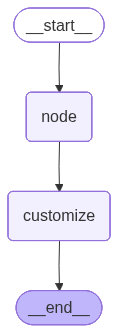

In [22]:
#define State Schema using TypedDict
from typing_extensions import TypedDict
class State(TypedDict):
    name : str
    age : int

#create simple node
def node(state:State):
    return {"name":state["name"],"age":state["age"]}

def customize(state:State):
    return {"name":state["name"] + " How are you!!"}

#build the State Graph and add node to it
from langgraph.graph import StateGraph,START,END
graph = StateGraph(State)

graph.add_node("node",node)
graph.add_node("customize",customize)

#create the edges of the graph
graph.add_edge(START,"node")
graph.add_edge("node","customize")
graph.add_edge("customize",END)

#compile the graph
graph_builder = graph.compile()

#visulaize the graph
from IPython.display import Image,display
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [23]:
graph_builder.invoke({"name":"suresh","age":23})

{'name': 'suresh How are you!!', 'age': 23}

In [ ]:
## drawback of defining state with TypedDict
graph_builder.invoke({"name":123,"age":23})

{'name': 123, 'age': 23}

#### drawback - No Runtime Type Checking => {'name': 123, 'age': 23} doesn't throw error

#### I.2 - State Schema With DataClasses

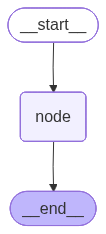

In [38]:
# define State Schema With DataClasses
from dataclasses import dataclass
@dataclass
class DataClassState:
    name : str

#create nodes
def node(state:DataClassState):
    return {"name":state.name}

#create state graph and add nodes
from langgraph.graph import StateGraph,START,END
graph = StateGraph(DataClassState)

graph.add_node("node",node)

#create edges
graph.add_edge(START,"node")
graph.add_edge("node",END)

#compile the graph
graph_builder = graph.compile()

#visualize the graph
from IPython.display import display,Image
display(Image(graph_builder.get_graph().draw_mermaid_png()))


In [39]:
#invocation
graph_builder.invoke(DataClassState(name="suresh"))

{'name': 'suresh'}

In [ ]:
#drawback - No Runtime Type Checking
graph_builder.invoke(DataClassState(name=123))

{'name': 123}

#### Drawback - No Run time Type Checking => {'name': 123}

#### II - Pydantic Data Validation
- Provides Runtime Validation

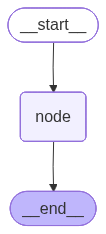

In [41]:
#define State Schema using Pydantic
from pydantic import BaseModel
class PydanticState(BaseModel):
    name : str

#create nodes
def node(state:PydanticState):
    return {"name":state.name}

#create graph and add node
from langgraph.graph import StateGraph,START,END
graph = StateGraph(PydanticState)

graph.add_node("node",node)

#create and add edges
graph.add_edge(START,"node")
graph.add_edge("node",END)

#compile the graph
graph_builder = graph.compile()

#visualize the graph
from IPython.display import Image,display
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [44]:
#invocation
graph_builder.invoke(PydanticState(name="suresh"))

{'name': 'suresh'}

In [ ]:
#advantage - Runtime Validation
graph_builder.invoke(PydanticState(name=123))

ValidationError: 1 validation error for PydanticState
name
  Input should be a valid string [type=string_type, input_value=123, input_type=int]
    For further information visit https://errors.pydantic.dev/2.12/v/string_type

##### Advantage - Runtime Validation => ValidationError: 1 validation error for PydanticState name Input should be a valid string [type=string_type, input_value=123, input_type=int]

#### III - Chains In LangGraph

#### Chain Using LangGraph
we can build a simple chain using Langgraph that uses 4 important concepts

- How to use chat messages as our graph state
- How to use chat models in graph nodes
- How to bind tools to our LLM in chat models
- How to execute the tools call in our graph nodes 

In [ ]:
from typing_extensions import TypedDict
from typing import Annotated
from langgraph.graph.messages import add_messages

class State(TypedDict):
    messages : Annotated[list[]]